In [1]:
# https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html
%matplotlib inline
import os, itertools, pickle
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf

from sklearn import impute, preprocessing


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#import xgboost as xgb

# pip install statsmodels

RAWDATA_PATH = "../rawData/"

In [5]:
#raw_data = pd.read_csv(os.path.join(RAWDATA_PATH, "all_analysis_data.tsv"), sep="\t")
with open(os.path.join(RAWDATA_PATH, "analysis_data_no_scale.pickle"), "rb") as f:
    raw_data = pickle.load(f)
    
two_dis_list = ['hypertension,stroke', 'hypertension,coronary_heart_disease',
                'hypertension,diabetes', 'hypertension,malignant_tumor',
                'hypertension,Mental_disorders', 'stroke,coronary_heart_disease',
                'stroke,diabetes', 'coronary_heart_disease,diabetes',
                'coronary_heart_disease,malignant_tumor', 'gastroenteritis,gallstones_or_cholecyst', 
                'hyperlipidemia,gallstones_or_cholecyst','hypertension,gallstones_or_cholecyst',
                'hypertension,hyperlipidemia']

two_list = ["AND".join(x.split(",")) for x in two_dis_list]
for item in two_list:
    tmp_data = raw_data[["province_english", item]].groupby("province_english").sum() / raw_data[["province_english", item]].groupby("province_english").count() * 10000
    tmp_data.loc["Total"] = raw_data[item].sum() / raw_data[item].count() * 10000
    
    if item == two_list[0]:
        plot_data = tmp_data
    else:
        plot_data = pd.concat([plot_data, tmp_data], axis=1)
        
plot_data.index.name = ""
plot_data = plot_data.T
plot_data = plot_data[['Chongqing', 'Guizhou', 'Sichuan', 'Xizang', 'Yunnan']]
plot_data.index = [" and ".join(x.split("AND")) for x in plot_data.index]
plot_data = plot_data.rename(index={'gastroenteritis and gallstones_or_cholecyst':'gastroenteritis and gallstones',
                                    'hyperlipidemia and gallstones_or_cholecyst':'hyperlipidemia and gallstones',
                                    'hypertension and gallstones_or_cholecyst':'hypertension and gallstones'})

[Text(0.5, 46.249999999999986, ''), Text(108.24999999999996, 0.5, '')]

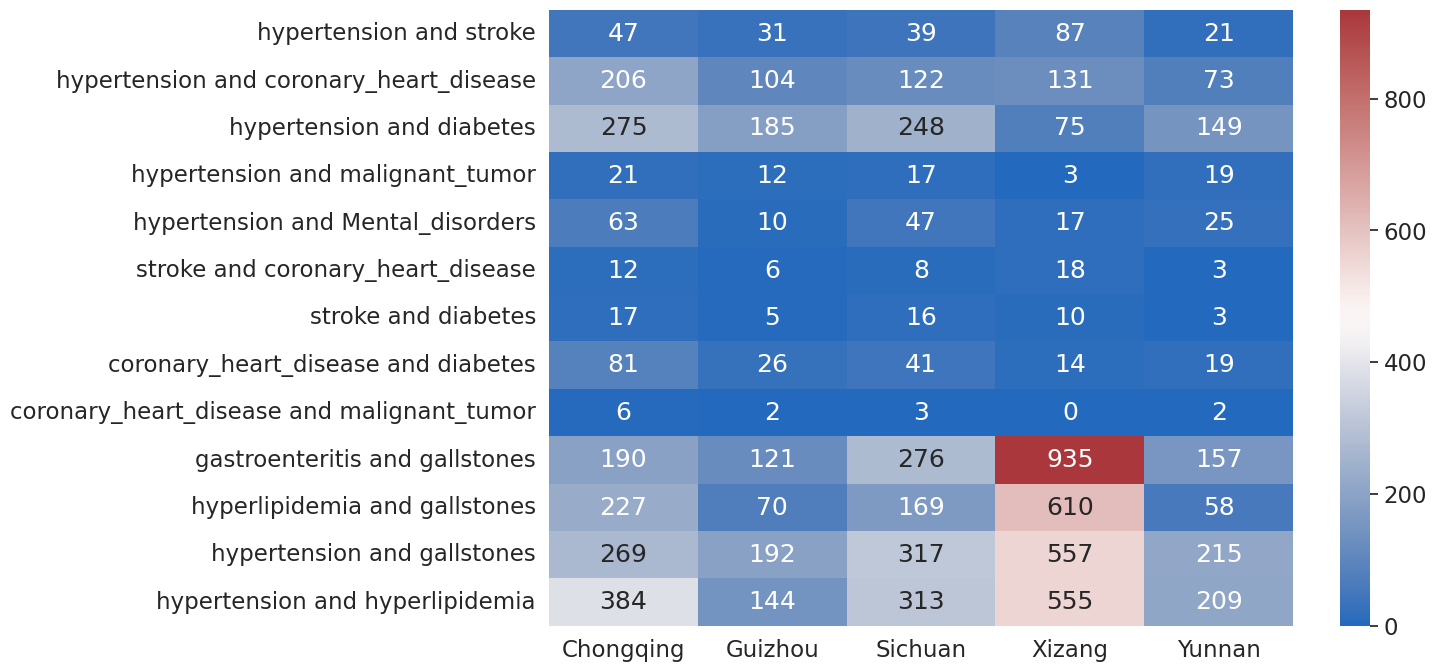

In [7]:
sns.set(font_scale=1.5, rc={'figure.figsize':(12,8)}, style="whitegrid")

g = sns.heatmap(plot_data, annot=True, fmt=".0f", cmap="vlag")
g.set(xlabel="", ylabel="")

#plt.savefig("./two_dis_province_heatmap.pdf", format="pdf", bbox_inches="tight", transparent=True)